In [1]:
# importing the necessary libraries

from numpy import array
import numpy as np
import pandas as pd
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
# let's get the data

from google.colab import files
uploaded = files.upload()


Saving lat_long.csv to lat_long.csv


In [21]:
import io
df = pd.read_csv(io.StringIO(uploaded['lat_long.csv'].decode('utf-8')))


In [23]:
# rounding off the lat_long for two reasons 1) it is able to generalise well
# 2) Secondly, importantly, finding optimal number of clusters and then the centroids requires a lot of euclidean distance calculation
# which is heavy (squared and under_roots), rounding off helps in reducing the time taken to compute the distances

df = df.round(2)

In [24]:
# removing the Id column, it is not adding any value, except to tell us that data has 250,000 lat_long points
del df['Id']


In [25]:
# confirmation of above operations
# works fine !

df

,latitude,longitude
0,87.33,144.48
1,-22.61,143.38
2,-43.53,-78.60
3,-50.79,-8.42
4,-49.27,-62.17
...,...,...
249995,61.70,-115.33
249996,-62.29,160.90
249997,-1.65,27.33
249998,-62.36,5.45


In [26]:
# creating a copy of original data to run ML models
x = df[['latitude','longitude']]
x

,latitude,longitude
0,87.33,144.48
1,-22.61,143.38
2,-43.53,-78.60
3,-50.79,-8.42
4,-49.27,-62.17
...,...,...
249995,61.70,-115.33
249996,-62.29,160.90
249997,-1.65,27.33
249998,-62.36,5.45


In [34]:
# here we use the Kmeans clustering model
# WCSS (Within-Cluster-Sum-of-Squares) is defined as the sum of the squared distance between each member of the cluster and its centroid
# we will run for 15 times (taken randomly) and will check the WCSS score against each no. of clusters
# we will check the no of clusters after which the WCSS is not falling too much
# the marginal benefit of falling WCSS is less compared to the cost of computation, which is the idea behing the elbow method

wcss = {}
run = 15
for i in range(1, run):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    wcss[i] = kmeans.inertia_

In [35]:
# let's see the distance against each number of cluster (which are the keys)
# we can see that after 8 clusters the rate of decrease in WCSS has fallen significantly
# currently, it looks like 8 is the optimal number of clusters for our dataset
# let's verify using couple more methods

wcss

{1: 3377654434.3883395,
 2: 1349944736.2617295,
 3: 973140398.6754223,
 4: 773706438.2760775,
 5: 602739105.7266858,
 6: 467921197.4666044,
 7: 393623491.98605084,
 8: 337209756.1288835,
 9: 304244904.0239365,
 10: 276643472.9328099,
 11: 254679069.5999413,
 12: 234359542.97107562,
 13: 213821530.34068283,
 14: 194816461.95094115}

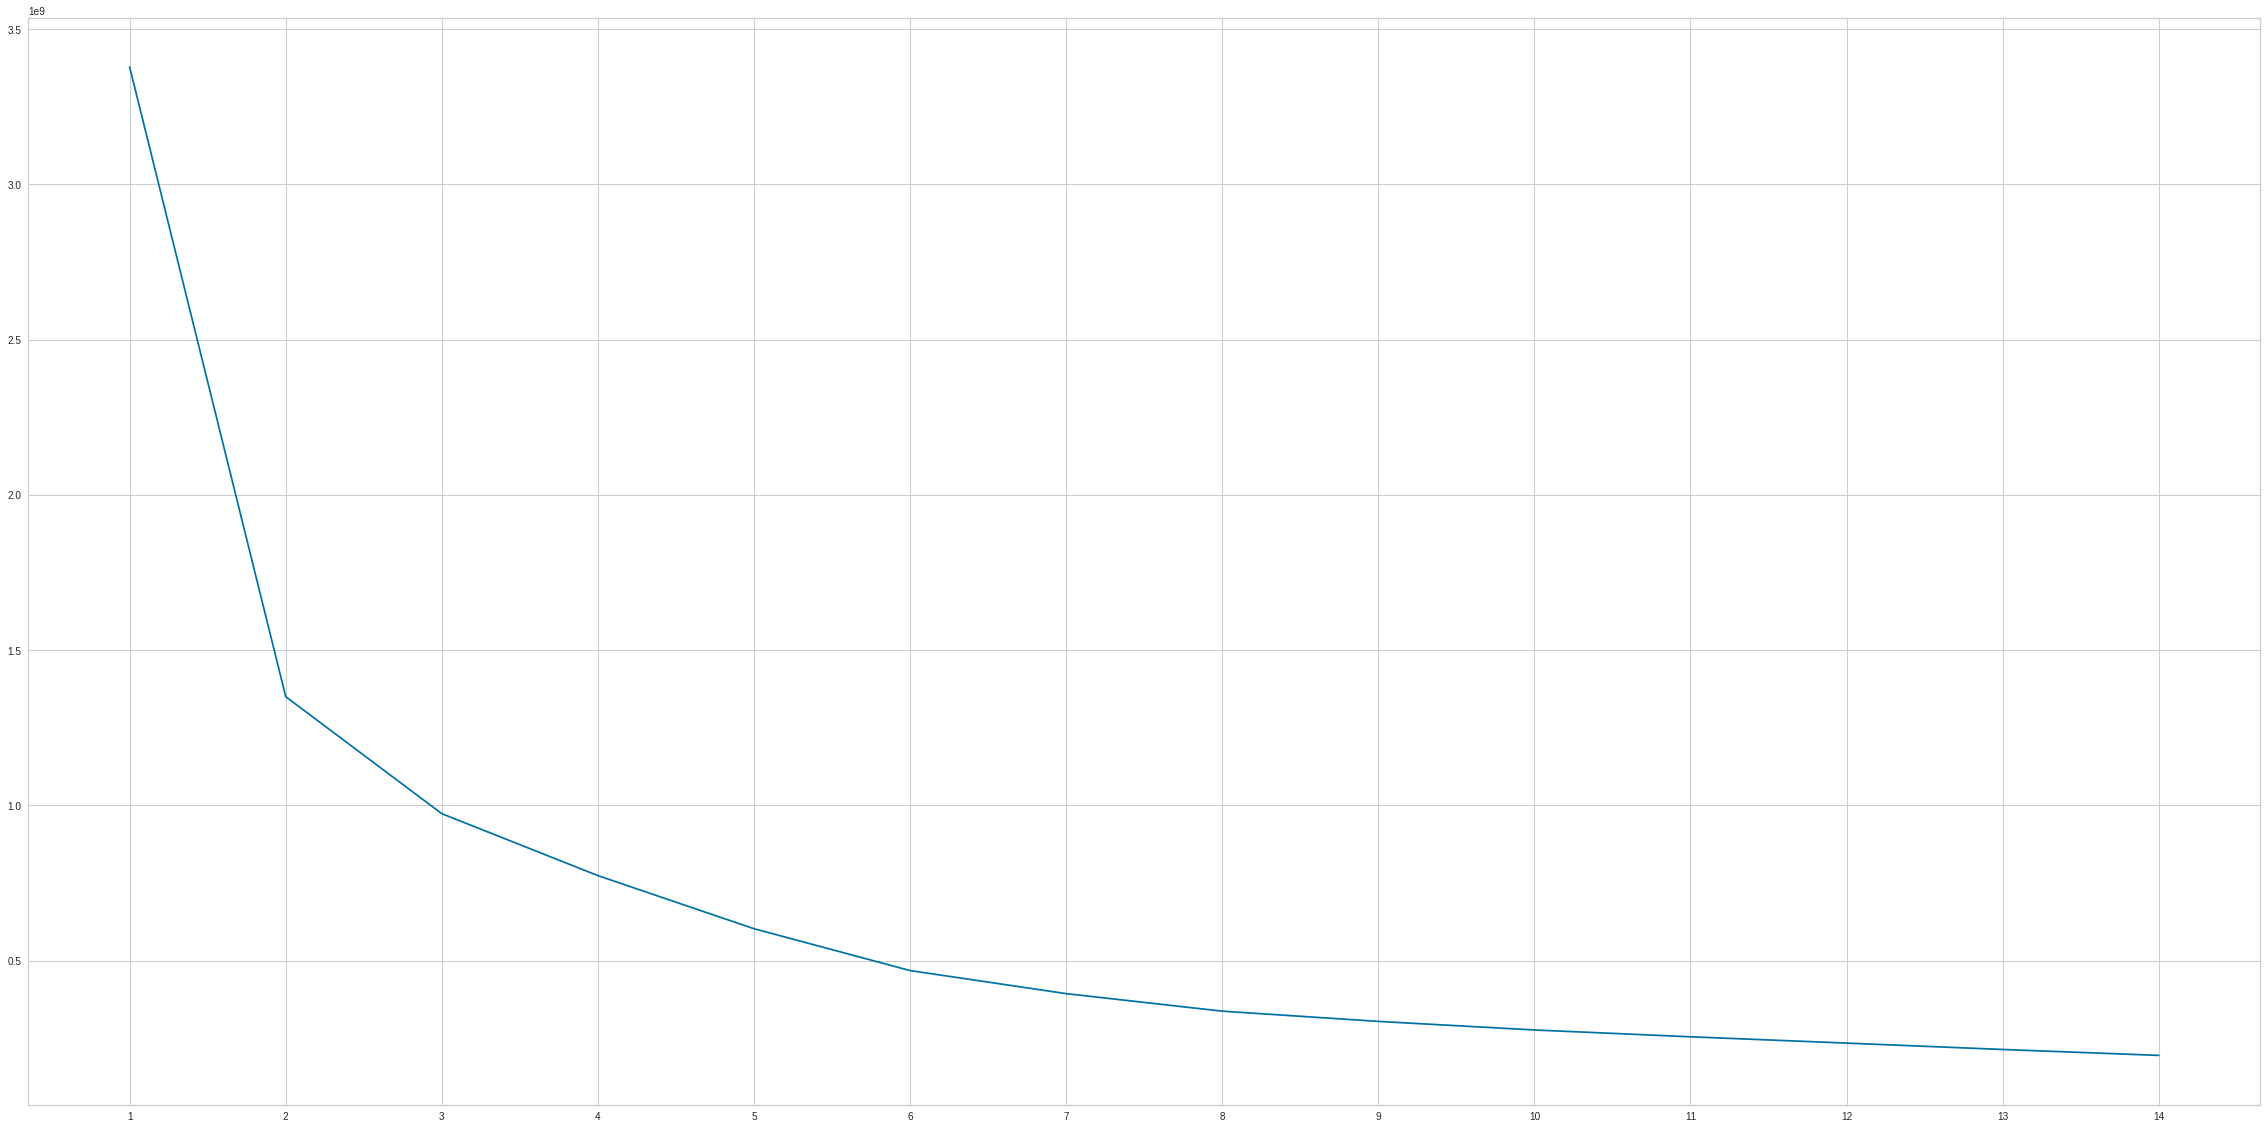

In [36]:
# method 1: let's plot #cluster v/s WCSS and check where the 'elbow' of the graph is coming out to be
# looks like cluter = 6 and cluster = 8 have elbows, it is a bit hard to decide
# but we are on the right track, it is either 8 or 6

xx = [x for x in wcss.keys()]
yy = [x for x in wcss.values()]
plt.figure(figsize = (40,20))
plt.xticks(xx)
plt.plot(xx,yy)
plt.show()

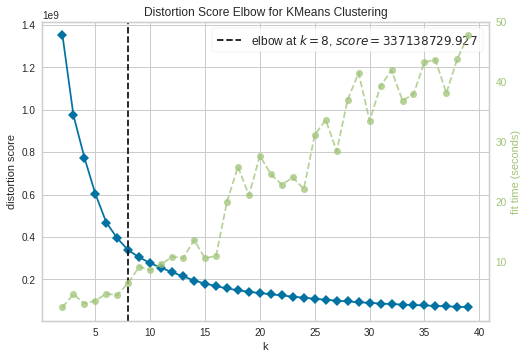

In [39]:

# Import ElbowVisualizer
# elbow visualiser is a powerful visualising library which gives you a clear cut idea as to the optimal number of clusters
# you can see, it beautifully points at 8 as the optimal number of clusters 


from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,40), timings= True)
visualizer.fit(x)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [12]:
# silhouette score is another very useful way to find optimal no of clusters
# jeremy jordan defines slihouttes score as follows: 


'''Silhouette score combines the average within-cluster distance with average nearest-cluster distance to assign a value between -1 and 1. 
A value below zero denotes that the observation is probably in the wrong cluster and a value closer to 1 denotes that the observation is a 
great fit for the cluster and clearly separated from other clusters. This coefficient essentially measures how close an observation is to 
neighboring clusters, where it is desirable to be the maximum distance possible from neighboring clusters.'''


# takes a lot of time to run hence commented out
'''
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Use silhouette score to find optimal number of clusters to segment the data
num_clusters = np.arange(2,10)
results = {}
for size in num_clusters:
    model = KMeans(n_clusters = size).fit(x)
    predictions = model.predict(x)
    results[size] = silhouette_score(x, predictions)

best_size = max(results, key=results.get)
'''

'\nfrom sklearn.cluster import KMeans\nfrom sklearn.metrics import silhouette_score\nimport numpy as np\n\n# Use silhouette score to find optimal number of clusters to segment the data\nnum_clusters = np.arange(2,10)\nresults = {}\nfor size in num_clusters:\n    model = KMeans(n_clusters = size).fit(x)\n    predictions = model.predict(x)\n    results[size] = silhouette_score(x, predictions)\n\nbest_size = max(results, key=results.get)\n'

In [45]:
# create a new column called clusters in dataframe x
# add cluster number (1 to 8) against each lat_long data point
wcss = {}
run = 9
for i in range(1, run):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    wcss[i] = kmeans.inertia_
x['clusters'] = 1+kmeans.fit_predict(x)

In [46]:
x


,latitude,longitude,clusters
0,87.33,144.48,7
1,-22.61,143.38,3
2,-43.53,-78.60,8
3,-50.79,-8.42,8
4,-49.27,-62.17,8
...,...,...,...
249995,61.70,-115.33,4
249996,-62.29,160.90,3
249997,-1.65,27.33,5
249998,-62.36,5.45,5


In [31]:
'''# finding the centroid of these 8 clusters
import scipy
closest, distance = scipy.cluster.vq.vq(model.cluster_centers_,x.values)
print(closest)'''


[  4504 177419  36216 139091  83287 236293 179050]


In [83]:
# could not figure out how to do it with GNN although I understoodd the MNIST link using pytorch.geometric, but it was supervised
#Classify a set of observations into k clusters with k centroids using the k-means algorithm.

a = scipy.cluster.vq.kmeans2(x.drop(['clusters'], axis = 1), 8, iter=50)
print("centroids")
a[0]

centroids


array([[  45.12602101,  -50.93737747],
       [ -44.56652179,  -39.94280761],
       [ -44.78719809,  137.14273947],
       [  45.18933597,  132.47474704],
       [  44.86930168, -137.59582345],
       [ -45.30699006,   50.14715678],
       [ -45.04342201, -133.25611101],
       [  44.48023708,   39.02286876]])

In [51]:
# cluster mapping 

x['clusters'] = 1+kmeans.fit_predict(x)

In [52]:
x



,latitude,longitude,clusters
0,87.33,144.48,2
1,-22.61,143.38,7
2,-43.53,-78.60,1
3,-50.79,-8.42,1
4,-49.27,-62.17,1
...,...,...,...
249995,61.70,-115.33,6
249996,-62.29,160.90,7
249997,-1.65,27.33,5
249998,-62.36,5.45,5


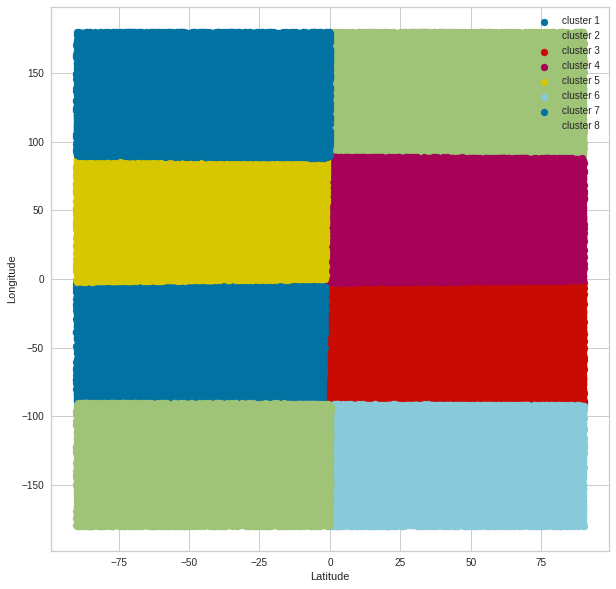

In [78]:
# plotting the clusters for visualisation and verification

plt.figure(figsize = (10,10))
for k in range(1,9):
    data = x[x["clusters"]==k]
    plt.scatter(data["latitude"],data["longitude"], label = "cluster {}".format(k))
   

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(loc='upper right')

In [79]:
x

,latitude,longitude,clusters
0,87.33,144.48,2
1,-22.61,143.38,7
2,-43.53,-78.60,1
3,-50.79,-8.42,1
4,-49.27,-62.17,1
...,...,...,...
249995,61.70,-115.33,6
249996,-62.29,160.90,7
249997,-1.65,27.33,5
249998,-62.36,5.45,5


In [81]:
# downloading the CSV

x.to_csv('sample.csv')
from google.colab import files
files.download("sample.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>